In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
df=pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
print("Features In The Data Set are")
features=list(df.columns)
for i in range(len(features)):
    print(features[i],end="\t\t")
    if i%5==0:
        print('\n')

Features In The Data Set are
Id		

MSSubClass		MSZoning		LotFrontage		LotArea		Street		

Alley		LotShape		LandContour		Utilities		LotConfig		

LandSlope		Neighborhood		Condition1		Condition2		BldgType		

HouseStyle		OverallQual		OverallCond		YearBuilt		YearRemodAdd		

RoofStyle		RoofMatl		Exterior1st		Exterior2nd		MasVnrType		

MasVnrArea		ExterQual		ExterCond		Foundation		BsmtQual		

BsmtCond		BsmtExposure		BsmtFinType1		BsmtFinSF1		BsmtFinType2		

BsmtFinSF2		BsmtUnfSF		TotalBsmtSF		Heating		HeatingQC		

CentralAir		Electrical		1stFlrSF		2ndFlrSF		LowQualFinSF		

GrLivArea		BsmtFullBath		BsmtHalfBath		FullBath		HalfBath		

BedroomAbvGr		KitchenAbvGr		KitchenQual		TotRmsAbvGrd		Functional		

Fireplaces		FireplaceQu		GarageType		GarageYrBlt		GarageFinish		

GarageCars		GarageArea		GarageQual		GarageCond		PavedDrive		

WoodDeckSF		OpenPorchSF		EnclosedPorch		3SsnPorch		ScreenPorch		

PoolArea		PoolQC		Fence		MiscFeature		MiscVal		

MoSold		YrSold		SaleType		SaleCondition		SalePrice		



In [5]:
for i in features:
    print(i,' ',df[i].isnull().sum(),end='\n')

Id   0
MSSubClass   0
MSZoning   0
LotFrontage   259
LotArea   0
Street   0
Alley   1369
LotShape   0
LandContour   0
Utilities   0
LotConfig   0
LandSlope   0
Neighborhood   0
Condition1   0
Condition2   0
BldgType   0
HouseStyle   0
OverallQual   0
OverallCond   0
YearBuilt   0
YearRemodAdd   0
RoofStyle   0
RoofMatl   0
Exterior1st   0
Exterior2nd   0
MasVnrType   8
MasVnrArea   8
ExterQual   0
ExterCond   0
Foundation   0
BsmtQual   37
BsmtCond   37
BsmtExposure   38
BsmtFinType1   37
BsmtFinSF1   0
BsmtFinType2   38
BsmtFinSF2   0
BsmtUnfSF   0
TotalBsmtSF   0
Heating   0
HeatingQC   0
CentralAir   0
Electrical   1
1stFlrSF   0
2ndFlrSF   0
LowQualFinSF   0
GrLivArea   0
BsmtFullBath   0
BsmtHalfBath   0
FullBath   0
HalfBath   0
BedroomAbvGr   0
KitchenAbvGr   0
KitchenQual   0
TotRmsAbvGrd   0
Functional   0
Fireplaces   0
FireplaceQu   690
GarageType   81
GarageYrBlt   81
GarageFinish   81
GarageCars   0
GarageArea   0
GarageQual   81
GarageCond   81
PavedDrive   0
WoodDeckSF  

In [6]:
df.drop(columns='Alley',axis=1,inplace=True)

In [7]:
df.shape

(1460, 80)

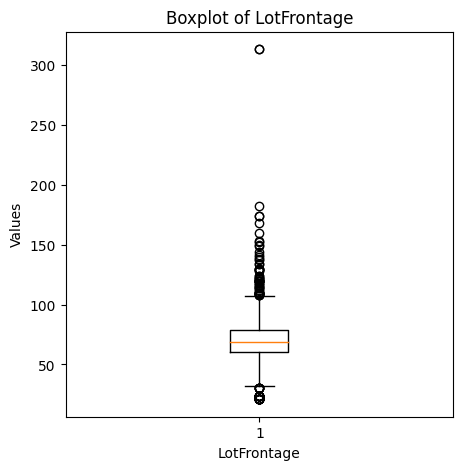

In [8]:
# Drop NaN values for plotting
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())

plt.figure(figsize=(5, 5))
plt.boxplot(df['LotFrontage'])
plt.title('Boxplot of LotFrontage')
plt.xlabel('LotFrontage')
plt.ylabel('Values')
plt.show()

In [9]:
q1=np.quantile(df['LotFrontage'],0.25)
q3=np.quantile(df['LotFrontage'],0.75)
iqr=q3-q1
med=np.median(df['LotFrontage'])
lb=q1-(1.5*iqr)
up=q3+(1.5*iqr)
outliers=len(df[(df['LotFrontage']<=lb)| (df['LotFrontage']>=up)])
print(outliers)

106


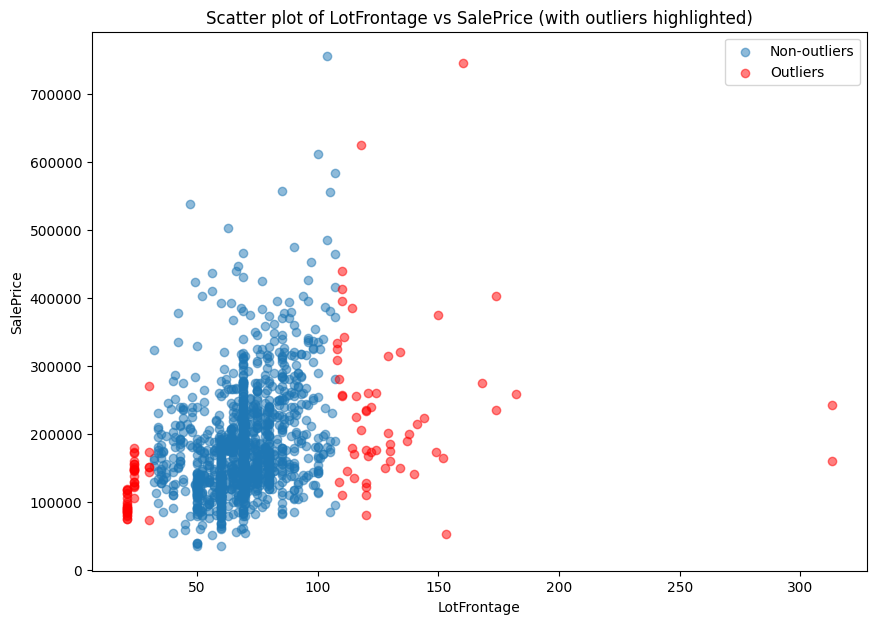

In [10]:
outliers = df[(df['LotFrontage'] <= lb) | (df['LotFrontage'] >= up)]
non_outliers = df[(df['LotFrontage'] > lb) & (df['LotFrontage'] < up)]

# Create scatter plot
plt.figure(figsize=(10, 7))
plt.scatter(non_outliers['LotFrontage'], non_outliers['SalePrice'], alpha=0.5, label='Non-outliers')
plt.scatter(outliers['LotFrontage'], outliers['SalePrice'], color='red', alpha=0.5, label='Outliers')
plt.title('Scatter plot of LotFrontage vs SalePrice (with outliers highlighted)')
plt.xlabel('LotFrontage')
plt.ylabel('SalePrice')
plt.legend()
plt.show()

<Axes: >

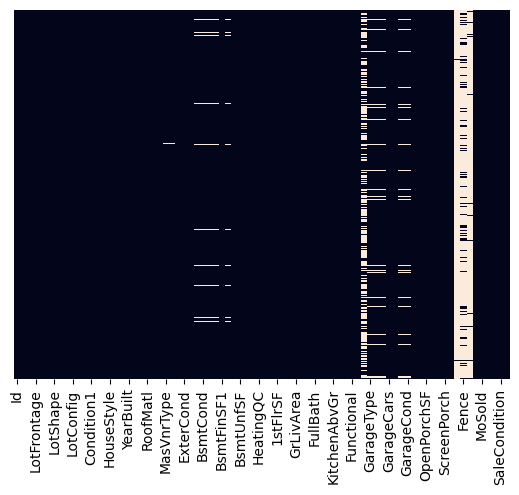

In [11]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [12]:
df['BsmtCond']=df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtQual']=df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])
df['FireplaceQu']=df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])
df['GarageType']=df['GarageType'].fillna(df['GarageType'].mode()[0])
df.drop(columns='GarageYrBlt',axis=1,inplace=True)
df.shape

(1460, 79)

In [13]:
df['GarageFinish']=df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageQual']=df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageCond']=df['GarageCond'].fillna(df['GarageCond'].mode()[0])

In [14]:
df.drop(['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [15]:
df.shape

(1460, 76)

In [16]:
df.drop(['Id'],axis=1,inplace=True)
df.shape

(1460, 75)

In [17]:
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 75, dtype: int64

In [18]:
df['MasVnrType']=df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['MasVnrArea']=df['MasVnrArea'].fillna(df['MasVnrArea'].mode()[0])

<Axes: >

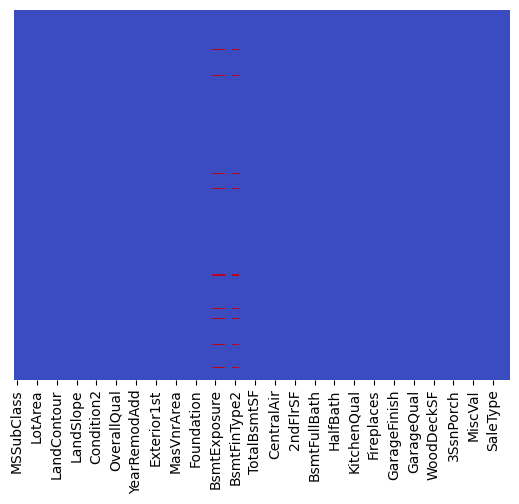

In [19]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')


In [20]:
df['BsmtExposure']=df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])

<Axes: >

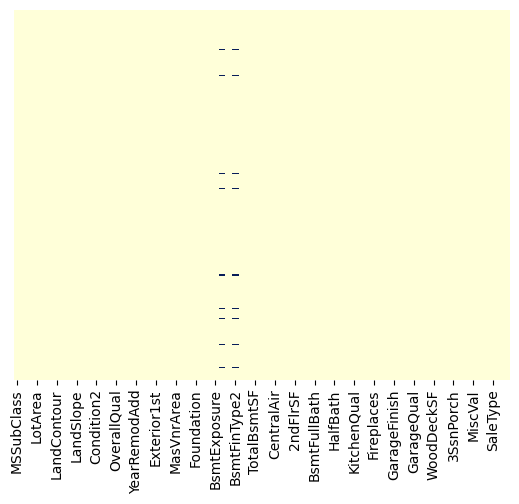

In [21]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu')

In [22]:
df['BsmtFinType2']=df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])
df.dropna(inplace=True)

In [23]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [24]:
columns=['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
         'Condition2','BldgType','Condition1','HouseStyle','SaleType',
        'SaleCondition','ExterCond',
         'ExterQual','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
        'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Heating','HeatingQC',
         'CentralAir',
         'Electrical','KitchenQual','Functional',
         'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive']

In [25]:
len(columns)

39

In [26]:
def category_onehot_multcols(multcolumns):
    df_final=final_df
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([final_df,df_final],axis=1)
        
    return df_final

In [27]:
main_df=df.copy()

In [28]:
test_df=pd.read_csv('Newtest.csv')

In [29]:
test_df.shape

(1459, 74)

In [30]:
test_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,120,0,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,34,0,0,0,0,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,36,0,0,0,0,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,82,0,0,144,0,0,1,2010,WD,Normal


In [31]:
final_df=pd.concat([df,test_df],axis=0)

In [32]:
final_df['SalePrice']

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1454         NaN
1455         NaN
1456         NaN
1457         NaN
1458         NaN
Name: SalePrice, Length: 2881, dtype: float64

In [33]:
final_df.shape

(2881, 75)

In [34]:
final_df=category_onehot_multcols(columns)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition2
BldgType
Condition1
HouseStyle
SaleType
SaleCondition
ExterCond
ExterQual
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive


In [35]:
final_df.shape

(2881, 235)

In [36]:
final_df =final_df.loc[:,~final_df.columns.duplicated()]

In [37]:

final_df.shape

(2881, 175)

In [38]:
final_df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,1,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,1,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,1,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,1,0,0,0,0,1,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,...,0,0,1,1,0,0,0,0,0,0
1455,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,...,0,0,1,0,0,0,1,0,0,0
1456,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,...,0,0,1,0,0,0,0,1,0,0
1457,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,...,0,0,1,1,0,0,0,0,0,0


In [39]:
df_Train=final_df.iloc[:1422,:]
df_Test=final_df.iloc[1422:,:]
df_Train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,1,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,1,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,1,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,1,0,0,0,0,1,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,1,1,0,0,0,0,1,0


In [40]:

df_Test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,0,0,1,1,0,0,0,0,0,0
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,0,0,1,1,0,0,0,0,0,0
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,0,0,1,1,0,0,0,0,0,0
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,0,0,1,1,0,0,0,0,0,0
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,0,0,1,1,0,0,0,0,1,0


In [41]:
df_Train.shape

(1422, 175)

In [43]:
df_Test.drop(['SalePrice'],axis=1,inplace=True)

C:\Users\sansk\AppData\Local\Temp\ipykernel_14648\3985304647.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Test.drop(['SalePrice'],axis=1,inplace=True)


In [44]:
X_train=df_Train.drop(['SalePrice'],axis=1)
y_train=df_Train['SalePrice']

In [46]:
import xgboost
classifier=xgboost.XGBRegressor()
import xgboost
regressor=xgboost.XGBRegressor()
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]

In [47]:
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [50]:
from sklearn.model_selection import RandomizedSearchCV
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [51]:
random_cv.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   n_iter=50, n_jobs=4,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
                                        'booster': ['gbtree', 'gblinear'],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2],
                                        'max_depth': [2, 3, 5, 10, 15],
                                        'min_child_weight': [1, 2, 3, 4],
                                        'n_estimators': [100, 500, 900, 1100,
                                                         1500]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=5)

In [52]:
random_cv.best_estimator_

XGBRegressor(base_score=0.25, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=900, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [66]:
best_regressor=random_cv.best_estimator_

In [67]:
regressor=xgboost.XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=900,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [68]:
regressor.fit(X_train,y_train)

e:\newpy\lib\site-packages\xgboost\core.py:158: UserWarning: [10:11:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
e:\newpy\lib\site-packages\xgboost\core.py:158: UserWarning: [10:11:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


XGBRegressor(base_score=0.25, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=None, colsample_bytree=1,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=0, max_depth=2,
             max_leaves=None, min_child_weight=1, missing=None,
             monotone_constraints=None, multi_strategy=None, n_estimators=900,
             n_jobs=1, nthread=None, num_parallel_tree=None, ...)

In [69]:
import pickle
filename = 'finalized_model.pkl'
pickle.dump(classifier, open(filename, 'wb'))

In [70]:
df_Test.shape

(1459, 174)

In [71]:
df_Test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,0,0,1,1,0,0,0,0,0,0
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,0,0,1,1,0,0,0,0,0,0
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,0,0,1,1,0,0,0,0,0,0
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,0,0,1,1,0,0,0,0,0,0
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,0,0,1,1,0,0,0,0,1,0


In [72]:
y_pred=best_regressor.predict(df_Test)
y_pred

array([120376.58 , 160261.61 , 185203.39 , ..., 171976.92 , 121610.586,
       233102.97 ], dtype=float32)

In [76]:
pred=pd.DataFrame(y_pred, columns=['SalePrice'])
sub_df=pd.read_csv('sample_submission.csv')
datasets=pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns=['Id','SalePrice']
datasets.to_csv('sample_submission.csv',index=False)

In [77]:
pred.columns=['SalePrice']
temp_df=df_Train['SalePrice'].copy()
temp_df.column=['SalePrice']

In [78]:
df_Train.drop(['SalePrice'],axis=1,inplace=True)
df_Train=pd.concat([df_Train,temp_df],axis=1)
df_Test.head()

C:\Users\sansk\AppData\Local\Temp\ipykernel_14648\2601476933.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Train.drop(['SalePrice'],axis=1,inplace=True)


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,0,0,1,1,0,0,0,0,0,0
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,0,0,1,1,0,0,0,0,0,0
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,0,0,1,1,0,0,0,0,0,0
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,0,0,1,1,0,0,0,0,0,0
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,0,0,1,1,0,0,0,0,1,0


In [79]:
df_Test=pd.concat([df_Test,pred],axis=1)

In [80]:
df_Train=pd.concat([df_Train,df_Test],axis=0)
df_Train.shape

(2881, 175)

In [81]:
X_train=df_Train.drop(['SalePrice'],axis=1)
y_train=df_Train['SalePrice']

In [87]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

def root_mean_squared_error(y_true, y_pred):
    return keras.backend.sqrt(keras.backend.mean(keras.backend.square(y_pred - y_true)))

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units=50, kernel_initializer='he_uniform', activation='relu', input_dim=174))

# Adding the second hidden layer
classifier.add(Dense(units = 25, kernel_initializer= 'he_uniform',activation='relu'))

# Adding the third hidden layer
classifier.add(Dense(units = 50, kernel_initializer= 'he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(units= 1, kernel_initializer= 'he_uniform'))

# Compiling the ANN
classifier.compile(loss=root_mean_squared_error, optimizer='Adamax')

# Fitting the ANN to the Training set
model_history=classifier.fit(X_train.values, y_train.values,validation_split=0.20, batch_size = 10, epochs = 1000)

Epoch 1/1000
231/231 [==============================] - 1s 3ms/step - loss: 152783.3594 - val_loss: 56713.4609
Epoch 2/1000
231/231 [==============================] - 0s 2ms/step - loss: 68243.2969 - val_loss: 55126.1680
Epoch 3/1000
231/231 [==============================] - 0s 1ms/step - loss: 64592.7773 - val_loss: 53825.2969
Epoch 4/1000
231/231 [==============================] - 0s 1ms/step - loss: 61658.8906 - val_loss: 50210.7578
Epoch 5/1000
231/231 [==============================] - 0s 2ms/step - loss: 58304.3828 - val_loss: 48250.1328
Epoch 6/1000
231/231 [==============================] - 0s 2ms/step - loss: 55089.5078 - val_loss: 46228.7422
Epoch 7/1000
231/231 [==============================] - 0s 1ms/step - loss: 51743.8594 - val_loss: 43178.0508
Epoch 8/1000
231/231 [==============================] - 0s 2ms/step - loss: 48851.0234 - val_loss: 39617.0938
Epoch 9/1000
231/231 [==============================] - 0s 1ms/step - loss: 45861.3281 - val_loss: 38171.6914
Epoch 10/

In [88]:
ann_pred=classifier.predict(df_Test.drop(['SalePrice'],axis=1).values)


46/46 [==============================] - 0s 2ms/step


In [89]:
from keras import backend as K
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [90]:
ann_pred

array([[128475.164],
       [162271.6  ],
       [193919.03 ],
       ...,
       [172213.47 ],
       [120002.09 ],
       [228141.92 ]], dtype=float32)